In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\akhil\AppData\Local\Temp\ipykernel_24460\1815169688.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
stopwords = set(stopwords.words('english'))
print(stopwords)

{'only', 'so', 'at', 'was', 'into', "didn't", 'more', 'when', 'am', 'doing', 'the', 'against', 'now', 'aren', 'haven', 'yours', 'such', 'while', 'between', 'hadn', 'isn', "wouldn't", 'couldn', 'd', "doesn't", 'who', 'why', "shan't", 'didn', 'is', 'their', 'on', 'own', 'don', 'o', 'she', 'same', 'his', 'ma', 'but', "it's", 'hasn', "don't", 'shan', 'where', 'again', 'yourselves', 'no', 'm', "should've", 'under', 'some', 'i', 'me', 'be', "she's", 'above', 'should', "mustn't", 'which', 'these', 'll', 'below', 'has', 'up', "you've", 'they', 'because', 'can', 'with', "weren't", 'doesn', 'both', 'nor', "wasn't", 'them', 'that', 'once', 'by', 'wouldn', 'themselves', 'and', "hadn't", 's', 'than', 'there', 'hers', 'out', 'herself', "shouldn't", 'weren', 'during', 'how', 'her', 'myself', 'ours', "mightn't", 'my', 'an', 'just', 've', "you'll", 'yourself', 'ain', "isn't", 'y', 'each', 'those', 'too', 'are', 'here', "you'd", 'any', 'all', 'you', 'whom', 'your', 'being', 'if', 'he', 'wasn', 'were', '

In [3]:
df = pd.read_csv(r"C:\Users\akhil\Downloads\archive (4)\mtsamples.csv")
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [4]:
df.shape

(4999, 6)

In [5]:
transcript_text = df['transcription']
transcript_text

0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4999, dtype: object

In [6]:
transcript_ls = []
for index,row in df.head().iterrows():
    transcript_ls.append(row['transcription'])
print(transcript_ls[2])

HISTORY OF PRESENT ILLNESS: , I have seen ABC today.  He is a very pleasant gentleman who is 42 years old, 344 pounds.  He is 5'9".  He has a BMI of 51.  He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at his lowest 260.  He is pursuing surgical attempts of weight loss to feel good, get healthy, and begin to exercise again.  He wants to be able to exercise and play volleyball.  Physically, he is sluggish.  He gets tired quickly.  He does not go out often.  When he loses weight he always regains it and he gains back more than he lost.  His biggest weight loss is 25 pounds and it was three months before he gained it back.  He did six months of not drinking alcohol and not taking in many calories.  He has been on multiple commercial weight loss programs including Slim Fast for one month one year ago and Atkin's Diet for one month two years ago.,PAST MEDICAL HISTORY: , He has difficulty climbing stairs, difficulty with airline seats, tying shoes,

In [7]:
text = transcript_ls[2]
words = word_tokenize(text)
print(words)

['HISTORY', 'OF', 'PRESENT', 'ILLNESS', ':', ',', 'I', 'have', 'seen', 'ABC', 'today', '.', 'He', 'is', 'a', 'very', 'pleasant', 'gentleman', 'who', 'is', '42', 'years', 'old', ',', '344', 'pounds', '.', 'He', 'is', '5', "'", '9', "''", '.', 'He', 'has', 'a', 'BMI', 'of', '51', '.', 'He', 'has', 'been', 'overweight', 'for', 'ten', 'years', 'since', 'the', 'age', 'of', '33', ',', 'at', 'his', 'highest', 'he', 'was', '358', 'pounds', ',', 'at', 'his', 'lowest', '260', '.', 'He', 'is', 'pursuing', 'surgical', 'attempts', 'of', 'weight', 'loss', 'to', 'feel', 'good', ',', 'get', 'healthy', ',', 'and', 'begin', 'to', 'exercise', 'again', '.', 'He', 'wants', 'to', 'be', 'able', 'to', 'exercise', 'and', 'play', 'volleyball', '.', 'Physically', ',', 'he', 'is', 'sluggish', '.', 'He', 'gets', 'tired', 'quickly', '.', 'He', 'does', 'not', 'go', 'out', 'often', '.', 'When', 'he', 'loses', 'weight', 'he', 'always', 'regains', 'it', 'and', 'he', 'gains', 'back', 'more', 'than', 'he', 'lost', '.', '

In [8]:
freq_count = dict()
for word in words:
    word = word.lower()
    if word in stopwords:
        continue
    if word in freq_count:
        freq_count[word] += 1
    else:
        freq_count[word] = 1 
print(freq_count)

{'history': 7, 'present': 1, 'illness': 1, ':': 12, ',': 101, 'seen': 1, 'abc': 1, 'today': 1, '.': 53, 'pleasant': 1, 'gentleman': 1, '42': 1, 'years': 5, 'old': 1, '344': 2, 'pounds': 7, '5': 2, "'": 2, '9': 3, "''": 2, 'bmi': 1, '51': 1, 'overweight': 2, 'ten': 3, 'since': 1, 'age': 1, '33': 1, 'highest': 1, '358': 1, 'lowest': 1, '260': 1, 'pursuing': 1, 'surgical': 2, 'attempts': 1, 'weight': 6, 'loss': 3, 'feel': 1, 'good': 1, 'get': 3, 'healthy': 1, 'begin': 1, 'exercise': 2, 'wants': 2, 'able': 1, 'play': 1, 'volleyball': 1, 'physically': 1, 'sluggish': 1, 'gets': 1, 'tired': 1, 'quickly': 1, 'go': 2, 'often': 1, 'loses': 1, 'always': 1, 'regains': 1, 'gains': 1, 'back': 3, 'lost': 2, 'biggest': 1, '25': 1, 'three': 1, 'months': 2, 'gained': 1, 'six': 1, 'drinking': 1, 'alcohol': 2, 'taking': 1, 'many': 1, 'calories': 1, 'multiple': 1, 'commercial': 1, 'programs': 1, 'including': 1, 'slim': 1, 'fast': 2, 'one': 4, 'month': 2, 'year': 1, 'ago': 2, 'atkin': 1, "'s": 1, 'diet': 1,

In [9]:
sentences = sent_tokenize(text)
print(sentences)

['HISTORY OF PRESENT ILLNESS: , I have seen ABC today.', 'He is a very pleasant gentleman who is 42 years old, 344 pounds.', 'He is 5\'9".', 'He has a BMI of 51.', 'He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at his lowest 260.', 'He is pursuing surgical attempts of weight loss to feel good, get healthy, and begin to exercise again.', 'He wants to be able to exercise and play volleyball.', 'Physically, he is sluggish.', 'He gets tired quickly.', 'He does not go out often.', 'When he loses weight he always regains it and he gains back more than he lost.', 'His biggest weight loss is 25 pounds and it was three months before he gained it back.', 'He did six months of not drinking alcohol and not taking in many calories.', "He has been on multiple commercial weight loss programs including Slim Fast for one month one year ago and Atkin's Diet for one month two years ago.,PAST MEDICAL HISTORY: , He has difficulty climbing stairs, difficulty wit

In [10]:
sentences[0]

'HISTORY OF PRESENT ILLNESS: , I have seen ABC today.'

In [11]:
def get_sentence_value():
    sentence_value = dict()
    for sentence in sentences:
        for word,freq in freq_count.items():
            if word in sentence.lower():
                if sentence in sentence_value:
                    sentence_value[sentence] += freq 
                else:
                    sentence_value[sentence] = freq 
    return sentence_value

sentence_value = get_sentence_value()
print(sentence_value)

{'HISTORY OF PRESENT ILLNESS: , I have seen ABC today.': 181, 'He is a very pleasant gentleman who is 42 years old, 344 pounds.': 175, 'He is 5\'9".': 60, 'He has a BMI of 51.': 57, 'He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at his lowest 260.': 192, 'He is pursuing surgical attempts of weight loss to feel good, get healthy, and begin to exercise again.': 182, 'He wants to be able to exercise and play volleyball.': 61, 'Physically, he is sluggish.': 159, 'He gets tired quickly.': 59, 'He does not go out often.': 59, 'When he loses weight he always regains it and he gains back more than he lost.': 69, 'His biggest weight loss is 25 pounds and it was three months before he gained it back.': 84, 'He did six months of not drinking alcohol and not taking in many calories.': 68, "He has been on multiple commercial weight loss programs including Slim Fast for one month one year ago and Atkin's Diet for one month two years ago.,PAST MEDICAL HIS

In [12]:
def get_sum_value():
    sum_value = 0
    for sentence in sentence_value:
        sum_value += sentence_value[sentence]

    average = int(sum_value / len(sentence_value))
    return average 
average = get_sum_value()
print(average)

119


In [13]:
summary = ''
for sentence in sentences:
    if (sentence in sentence_value) and (sentence_value[sentence] > 1.7 * average):
        summary += ' ' + sentence

print(summary)

 He has been on multiple commercial weight loss programs including Slim Fast for one month one year ago and Atkin's Diet for one month two years ago.,PAST MEDICAL HISTORY: , He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, difficulty walking, high cholesterol, and high blood pressure. He smokes one and a half pack a day for 15 years, but he has recently stopped smoking for the past two weeks.,FAMILY HISTORY: , Obesity, heart disease, and diabetes. Family history is negative for hypertension and stroke.,CURRENT MEDICATIONS:,  Include Diovan, Crestor, and Tricor.,MISCELLANEOUS/EATING HISTORY:  ,He says a couple of friends of his have had heart attacks and have had died. If he lost 70% of his excess body weight that would be 129 pounds and that would get him down to 215.,REVIEW OF SYSTEMS: , Negative for head, neck, heart, lungs, GI, GU, orthopedic, or skin. Extremities:  He has 1+ pitting edema.,IMPRESSION/PLAN:,  I have explained to 

In [14]:
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [15]:
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [16]:

df = df.dropna(subset=['transcription'])
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription           0
keywords             1068
dtype: int64

In [17]:
df.description[0]

' A 23-year-old white female presents with complaint of allergies.'

In [18]:
df.transcription[0]

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

In [19]:
df.medical_specialty.unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [20]:
len(df.medical_specialty.unique())

40

In [21]:
df['medical_specialty_code'] = pd.factorize(df['medical_specialty'])[0]
df['medical_specialty_code']

0       0
1       1
2       1
3       2
4       2
       ..
4994    0
4995    0
4996    0
4997    0
4998    0
Name: medical_specialty_code, Length: 4966, dtype: int64

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Label'] = le.fit_transform(df['medical_specialty'])

In [23]:
df.drop('Label',axis=1,inplace=True)
df

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,medical_specialty_code
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",0
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",1
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",1
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",2
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",2
...,...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN,0
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun...",0
4996,4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN,0
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN,0


In [24]:
val = df.loc[30,'medical_specialty_code']
val

5

In [25]:
df.iloc[val]

Unnamed: 0                                                                5
description                Morbid obesity.  Laparoscopic antecolic anteg...
medical_specialty                                                Bariatrics
sample_name                                    Laparoscopic Gastric Bypass 
transcription             PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...
keywords                  bariatrics, gastric bypass, eea anastomosis, r...
medical_specialty_code                                                    1
Name: 5, dtype: object

In [26]:
df.medical_specialty_code.dtypes

dtype('int64')

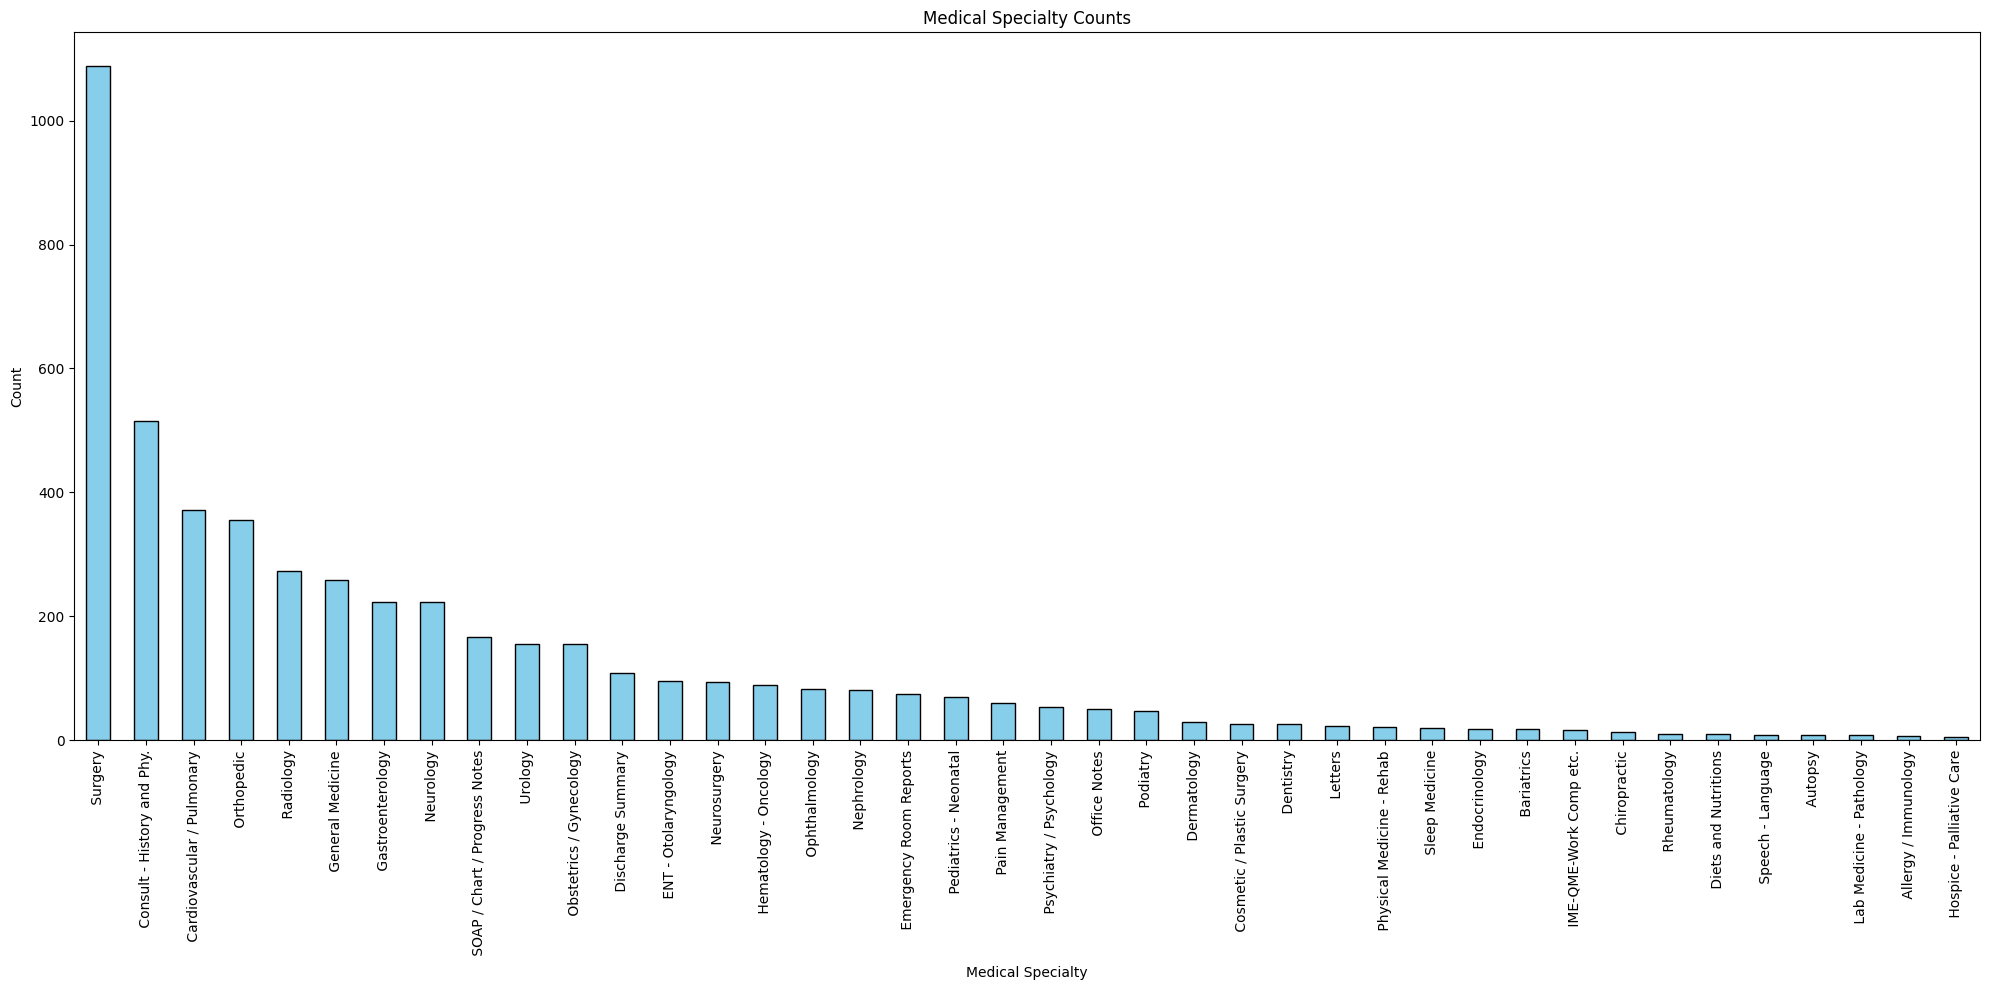

In [27]:
#check the balance in class
counts = df.medical_specialty.value_counts()

plt.figure(figsize=(20, 10)) 
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Medical Specialty Counts')
plt.xlabel('Medical Specialty')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
df=df[['transcription','medical_specialty_code']]

In [29]:
df

,transcription,medical_specialty_code
0,"SUBJECTIVE:, This 23-year-old white female pr...",0
1,"PAST MEDICAL HISTORY:, He has difficulty climb...",1
2,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",1
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",2
4,1. The left ventricular cavity size and wall ...,2
...,...,...
4994,"HISTORY:, I had the pleasure of meeting and e...",0
4995,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...",0
4996,"SUBJECTIVE: , This is a 42-year-old white fema...",0
4997,"CHIEF COMPLAINT: , This 5-year-old male presen...",0


In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [31]:
from transformers import RobertaModel, RobertaTokenizer
import torch

# define X and y
X = df['transcription'].tolist()
y = df['medical_specialty_code'].tolist()

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base').to(device)

# Tokenize X
inputs = tokenizer(X, padding=True, truncation=True, return_tensors="pt", max_length=256)

# generate embeddings in batches
def generate_embeddings(model, inputs, batch_size=16):
    model.eval()
    embeddings = []
    for i in range(0, inputs['input_ids'].size(0), batch_size):
        batch_input_ids = inputs['input_ids'][i:i+batch_size].to(device)
        batch_attention_mask = inputs['attention_mask'][i:i+batch_size].to(device)
        with torch.no_grad():
            # batch_outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
            # batch_embeddings = batch_outputs.last_hidden_state.mean(dim=1)
            batch_outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
            batch_embeddings = batch_outputs.last_hidden_state.mean(dim=1)
            embeddings.append(batch_embeddings.cpu().numpy())
    embeddings = np.concatenate(embeddings, axis=0)
    return embeddings

# Generate embeddings
embeddings = generate_embeddings(model, inputs, batch_size=16)

C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
# apply oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
embeddings_resampled, labels_resampled = ros.fit_resample(embeddings, y)

In [34]:
# train test val split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(embeddings_resampled, labels_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

from torch import nn, optim
import torch.nn.functional as F

# MLP classifier
class SimpleClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the classifier, loss criterion, and optimizer
hidden_dim = 128
num_classes = 40
mlp_model = SimpleClassifier(input_dim=768, hidden_dim=hidden_dim, num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

# Prepare data loaders
from torch.utils.data import DataLoader, TensorDataset
batch_size = 8
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32).to(device), torch.tensor(y_train, dtype=torch.long).to(device))
val_data = TensorDataset(torch.tensor(X_val, dtype=torch.float32).to(device), torch.tensor(y_val, dtype=torch.long).to(device))
train_loader = DataLoader(train_data, batch_size=batch_size)
val_loader = DataLoader(val_data, batch_size=batch_size)

In [35]:
# Training loop
best_val_loss = float('inf')
best_model_state = None

epochs = 30
for epoch in range(epochs):
    mlp_model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = mlp_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    # Validation for loss
    mlp_model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = mlp_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(val_loader)

    print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # Check if it's the lowest validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = mlp_model.state_dict()

Epoch 1, Training Loss: 1.8747, Validation Loss: 1.1897
Epoch 2, Training Loss: 1.0670, Validation Loss: 0.9215
Epoch 3, Training Loss: 0.8927, Validation Loss: 0.8126
Epoch 4, Training Loss: 0.8025, Validation Loss: 0.7679
Epoch 5, Training Loss: 0.7445, Validation Loss: 0.7300
Epoch 6, Training Loss: 0.7040, Validation Loss: 0.6998
Epoch 7, Training Loss: 0.6742, Validation Loss: 0.6922
Epoch 8, Training Loss: 0.6491, Validation Loss: 0.6966
Epoch 9, Training Loss: 0.6282, Validation Loss: 0.6981
Epoch 10, Training Loss: 0.6134, Validation Loss: 0.6793
Epoch 11, Training Loss: 0.6000, Validation Loss: 0.6630
Epoch 12, Training Loss: 0.5866, Validation Loss: 0.6719
Epoch 13, Training Loss: 0.5775, Validation Loss: 0.6506
Epoch 14, Training Loss: 0.5693, Validation Loss: 0.6580
Epoch 15, Training Loss: 0.5604, Validation Loss: 0.6526
Epoch 16, Training Loss: 0.5539, Validation Loss: 0.6580
Epoch 17, Training Loss: 0.5476, Validation Loss: 0.6512
Epoch 18, Training Loss: 0.5424, Validat

In [36]:
# Save the best model
torch.save(best_model_state, 'simple_classifier.pth')

# Clear memory
del inputs, labels, outputs, train_data, val_data, train_loader, val_loader
torch.cuda.empty_cache()

In [37]:
from sklearn.metrics import classification_report

# initialize the loaded model
loaded_model = SimpleClassifier(input_dim=768, hidden_dim=128, num_classes=40).to(device)

# Load the saved model parameters
loaded_model.load_state_dict(torch.load('simple_classifier.pth'))

# Ensure the model is in evaluation mode
loaded_model.eval()

# Test dataset preparation
test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32).to(device), torch.tensor(y_test, dtype=torch.long).to(device))
test_loader = DataLoader(test_data, batch_size=8)

# Evaluate on the test set using the loaded model
test_preds, test_labels = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = loaded_model(inputs)
        preds = torch.argmax(outputs, dim=1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

print("Classification Report on Test Set (Using Loaded Model):")
print(classification_report(test_labels, test_preds))
report = classification_report(test_labels, test_preds, output_dict=True)
macro_avg_f1 = report['macro avg']['f1-score']
weighted_avg_f1 = report['weighted avg']['f1-score']
print(f"Macro Average F1 Score: {macro_avg_f1}")
print(f"Weighted Average F1 Score: {weighted_avg_f1}")

Classification Report on Test Set (Using Loaded Model):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       227
           1       0.93      0.86      0.89       220
           2       0.50      0.57      0.54       229
           3       0.57      0.36      0.44       211
           4       0.94      0.91      0.93       207
           5       0.68      0.78      0.73       208
           6       0.36      0.24      0.29       210
           7       0.11      0.03      0.04       239
           8       0.93      1.00      0.97       225
           9       0.56      0.48      0.51       220
          10       0.89      1.00      0.94       216
          11       0.98      1.00      0.99       212
          12       0.37      0.28      0.32       222
          13       0.87      0.89      0.88       203
          14       0.77      1.00      0.87       209
          15       0.88      0.96      0.92       214
          16       0.71  

In [ ]:
from transformers import RobertaModel, RobertaTokenizer
import torch

# define X and y
X = df['transcription'].tolist()
y = df['medical_specialty_code'].tolist()

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base').to(device)

# Tokenize X
inputs = tokenizer(X, padding=True, truncation=True, return_tensors="pt", max_length=256)

# generate embeddings in batches
def generate_embeddings(model, inputs, batch_size=16):
    model.eval()
    embeddings = []
    for i in range(0, inputs['input_ids'].size(0), batch_size):
        batch_input_ids = inputs['input_ids'][i:i+batch_size].to(device)
        batch_attention_mask = inputs['attention_mask'][i:i+batch_size].to(device)
        with torch.no_grad():
            batch_outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
            batch_embeddings = batch_outputs.last_hidden_state.mean(dim=1)
            embeddings.append(batch_embeddings.cpu().numpy())
    embeddings = np.concatenate(embeddings, axis=0)
    return embeddings

# Generate embeddings
embeddings = generate_embeddings(model, inputs, batch_size=16)

C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
